In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [81]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [82]:
data.shape

(200, 5)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [84]:
#Dropping CustomerID column
data.drop('CustomerID',axis = 1,inplace = True)

In [85]:
#Replce male as 1 Female as 0
data['Gender'].replace(['Male','Female'],[1,0],inplace = True)

In [86]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [87]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#EDA





<ipython-input-88-144ddc9b5a7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Gender',data = data,palette = 'twilight_r')


<Axes: xlabel='Gender', ylabel='count'>

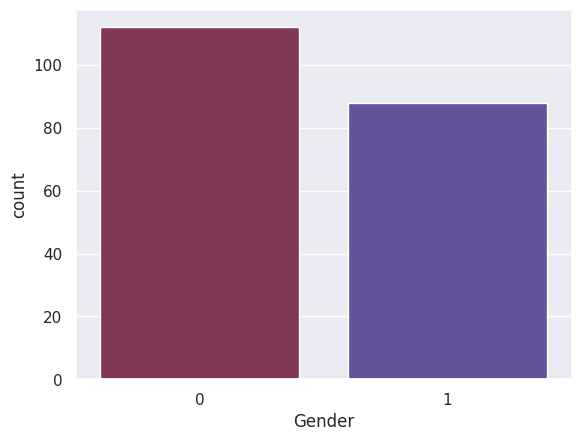

In [88]:
#Counting the number of males and females
sns.countplot(x ='Gender',data = data,palette = 'twilight_r')

**There are more female customer than male customer**

<Axes: >

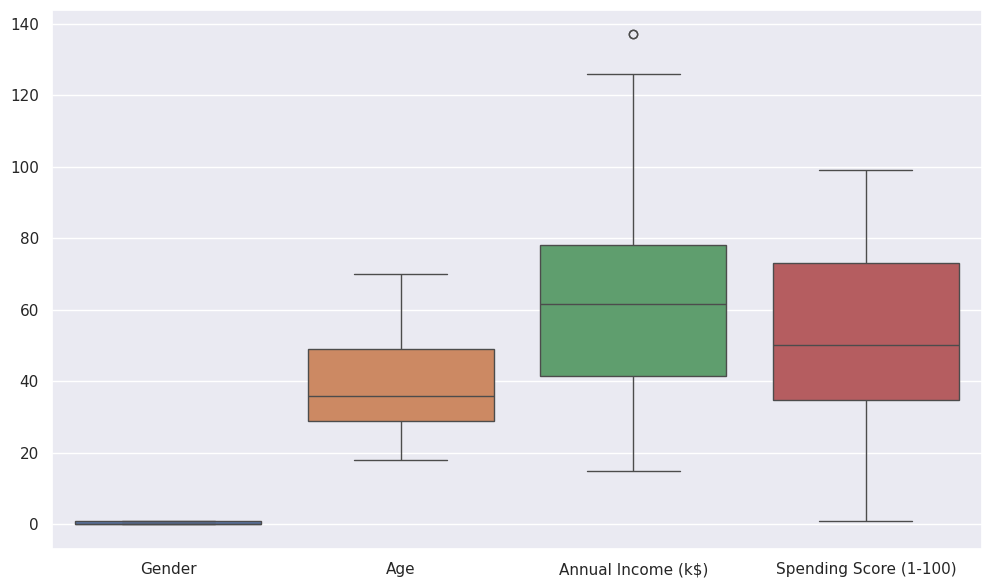

In [89]:
plt.figure(figsize = (12,7))
sns.boxplot(data= data)

**Outlier exists in Annual Income**

<Figure size 1200x800 with 0 Axes>

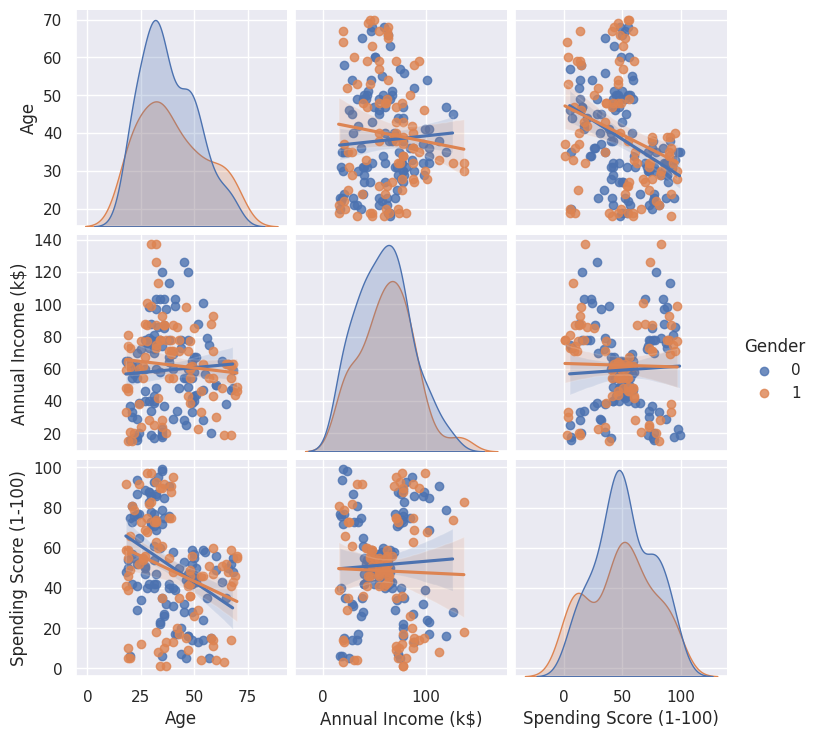

In [90]:
plt.figure(figsize = (12,8))
sns.pairplot(data,kind ='reg',hue = 'Gender')


**It can be seen that there is relation between Age,Annual Incomea and Spending Score.**

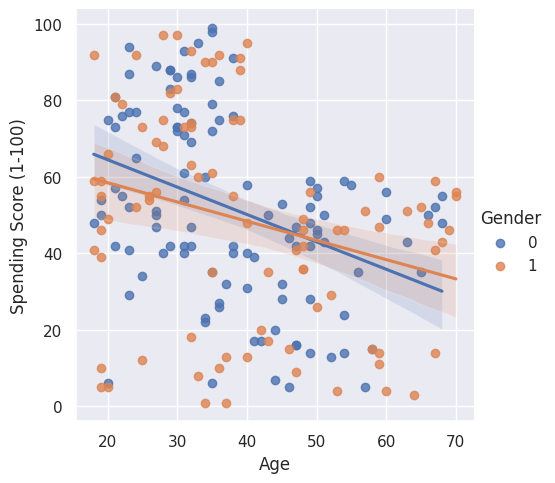

In [91]:
#Age vs Spending Score

sns.lmplot(x = "Age",y = 'Spending Score (1-100)',data = data,hue = 'Gender')

#Spending Score is is higher with Age 20-30



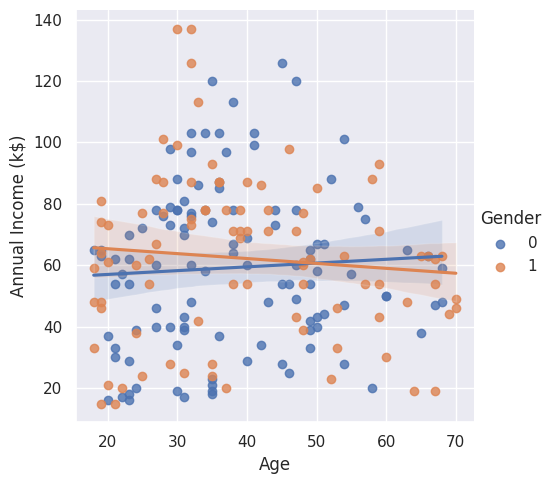

In [92]:
#Age vs Annual Income (k$)
sns.lmplot(x = 'Age',y = 'Annual Income (k$)',data = data,hue = "Gender")

#**It seems people who are 30 to 40 year old have high income**

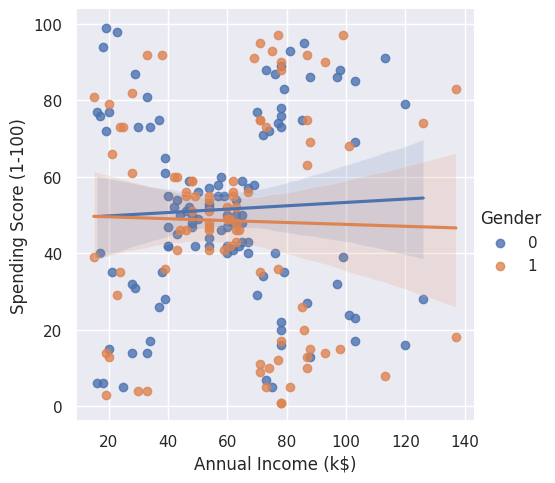

In [93]:
#Annual Income vs Spending Score(1-100)

data.head()
sns.lmplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data = data,hue = "Gender")

In [94]:
X = data.iloc[:,[2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [95]:
 #sum of squre within cluster
ssw= []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state =142)
  kmeans.fit(X)
  ssw.append(kmeans.inertia_)#Inertia is a measure of how well a clustering model fits the data.
ssw

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30273.394312070042,
 25043.970949607214,
 21850.165282585636,
 19701.35225128175,
 17970.674406287948,
 15961.902986261051,
 14408.827436810501,
 13019.664273129969,
 11678.756981237155,
 10788.851761456932,
 10053.000471991774,
 9352.989928845098,
 9020.852241901544]

Text(0, 0.5, 'ssw')

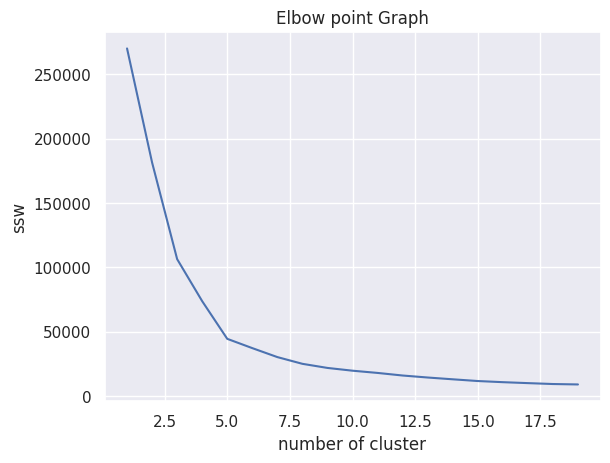

In [96]:
sns.set()
plt.plot(range(1,20),ssw)
plt.title('Elbow point Graph')
plt.xlabel('number of cluster')
plt.ylabel('ssw')


In [97]:
#From here got to know that we 5 is optimum number in less iteration
#Training the kmeans
kmeans = KMeans(n_clusters = 5,init= 'k-means++',random_state=69)
y_label = kmeans.fit_predict(X)
y_label



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

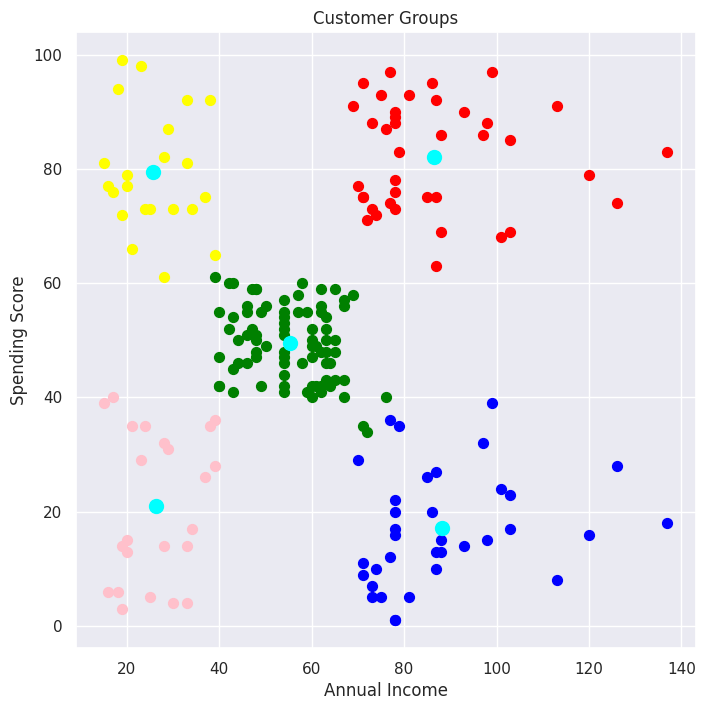

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_label==0,0], X[y_label==0,1], s=50, c='green', label= 'Cluster 1')
plt.scatter(X[y_label==1,0],X[y_label== 1,1],s = 50,c= 'red',label = 'Cluster 2')
plt.scatter(X[y_label==2,0],X[y_label== 2,1],s = 50,c= 'blue',label = 'Cluster 3')
plt.scatter(X[y_label==3,0],X[y_label== 3,1],s = 50,c= 'yellow',label = 'Cluster 4')
plt.scatter(X[y_label==4,0],X[y_label== 4,1],s = 50,c= 'pink',label = 'Cluster 4')

#plot the centroid

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'cyan',label = 'Clusters')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()